In [ ]:
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/Assignment1/training_data.csv
!wget https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/Assignment1/training_data_class_labels.csv

--2022-02-21 12:09:24--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/Assignment1/training_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 175702 (172K) [text/plain]
Saving to: ‘training_data.csv’

training_data.csv   100%[===================>] 171.58K  --.-KB/s    in 0.01s   

2022-02-21 12:09:25 (11.9 MB/s) - ‘training_data.csv’ saved [175702/175702]

--2022-02-21 12:09:25--  https://raw.githubusercontent.com/Dinesh-Adhithya-H/Data_Science_and_Machine_Learning/main/Assignment1/training_data_class_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

In [ ]:
import sklearn
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,KFold,GridSearchCV

In [ ]:
x_data=pd.read_csv("training_data.csv",header=None)
y_data=pd.read_csv("training_data_class_labels.csv",header=None)

In [ ]:
x_data.describe()

,0,1
count,4500.000000,4500.000000
mean,0.501716,0.247537
std,0.870713,0.506289
min,-1.308579,-0.765779
25%,-0.057827,-0.207921
50%,0.515105,0.238530
75%,1.072719,0.693420
max,2.307367,1.262082


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_data,np.array(y_data).reshape(-1,))

# 1. Plot the given training data using different colors for individual classes on the console in order to visualize it. Your code must show this plot on re-running it.

In [ ]:
np.array(y_data).reshape(-1,)

array([0, 1, 1, ..., 1, 1, 0])

Text(0.5, 1.0, 'Scatter plot of feature space')

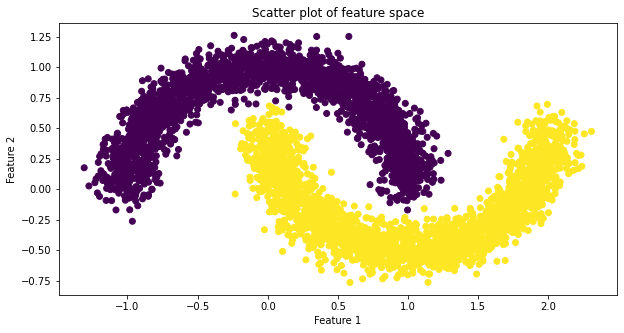

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x_data[0],x_data[1],c=y_data)
#plt.legend()
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of feature space")

# 2. Perform naive bayes, logistic regression and k-nearest neighbor classifiers to categorize the instances of the given test data. Initially, find the best performance for each of these classifiers by properly tuning its parameters as discussed in the class.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

## Logistic Regression

In [ ]:
lr=LogisticRegression(class_weight='balanced') 
lr_parameters = {
        'solver':('newton-cg','lbfgs','liblinear'),
        'C':[1,0.1,0.01,0.001]
        }
parameters={**lr_parameters} 
cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(lr,parameters,scoring='f1_macro',cv=cv)          
grid.fit(x_data,np.array(y_data).reshape(-1,))     
clf= grid.best_estimator_  
print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

********* Best Set of Parameters ********* 


LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cg')


In [ ]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       572
           1       0.89      0.88      0.89       553

    accuracy                           0.89      1125
   macro avg       0.89      0.89      0.89      1125
weighted avg       0.89      0.89      0.89      1125



Text(0.5, 1.0, 'Scatter plot of prediction by Logistic Regression')

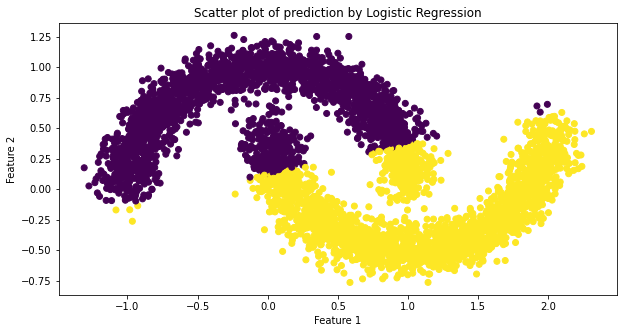

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x_data[0],x_data[1],c=clf.predict(x_data))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of prediction by Logistic Regression")

## Naive Bayes

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_data1 = scaler.fit_transform(x_data)

In [ ]:
nb=MultinomialNB()  
nb_parameters = {
        'alpha':(1,0.1,0.01,0.001),
        }
parameters={**nb_parameters} 

cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(nb,parameters,scoring='f1_macro',cv=cv)          
grid.fit(x_data1,np.array(y_data).reshape(-1,))     
clf= grid.best_estimator_  

print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

********* Best Set of Parameters ********* 


MultinomialNB(alpha=1)


In [ ]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       572
           1       0.77      0.86      0.82       553

    accuracy                           0.81      1125
   macro avg       0.81      0.81      0.81      1125
weighted avg       0.81      0.81      0.81      1125



Text(0.5, 1.0, 'Scatter plot of prediction by Naive Bayes')

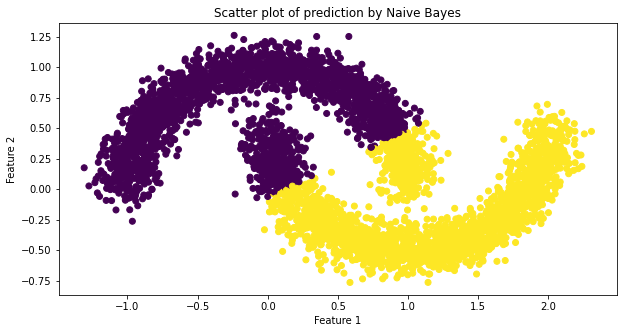

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x_data[0],x_data[1],c=clf.predict(x_data1))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of prediction by Naive Bayes")

## KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()  
knn_parameters = {
        'n_neighbors':(4,5,7,9,11,13,15,17,19,21),
        'weights':("uniform", "distance"),
        "p":(1,2)
        }
parameters={**knn_parameters} 

cv = KFold(n_splits=10, shuffle=True, random_state=1)
grid = GridSearchCV(knn,parameters,scoring="f1_macro",cv=cv)          
grid.fit(x_data1,np.array(y_data).reshape(-1,))     
clf= grid.best_estimator_  

print('********* Best Set of Parameters ********* \n\n')
print(clf)
    
predicted = clf.predict(x_test)
predicted =list(predicted)

********* Best Set of Parameters ********* 


KNeighborsClassifier(n_neighbors=17, p=1)


In [ ]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       572
           1       0.79      0.82      0.81       553

    accuracy                           0.81      1125
   macro avg       0.81      0.81      0.81      1125
weighted avg       0.81      0.81      0.81      1125



Text(0.5, 1.0, 'Scatter plot of prediction by K-Nearest Neighbours')

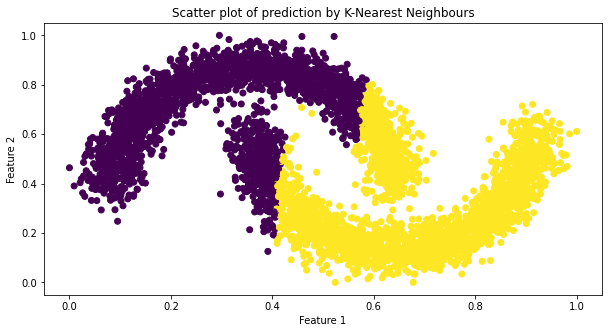

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter((x_data[0]-min(x_data[0]))/(max(x_data[0])-min(x_data[0])),(x_data[1]-min(x_data[1]))/(max(x_data[1])-min(x_data[1])),c=clf.predict(x_data))
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter plot of prediction by K-Nearest Neighbours")